### Working With Imbalanced Data and Classifier Evaluation

In today's lab, we're going to work through a sample classification problem that will allow us to see how to improve and evaluate a classifier where there's imbalanced data.  

The point is to get used to using a confusion matrix, and using metrics like `precision`, `recall` and the `f1_score` in order to think about how well our model is performing across different labels.

**Step 1:** Load in the `pima` dataset, and do the following:

 - Create training, validation and test sets
 - Fit a `GradientBoostingClassifier` with the default configuration on your training set
 - Get both model accuracy and the `f1_score` on the validation set

In [21]:
# your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.metrics import f1_score

In [22]:
df = pd.read_csv('/Users/liamsweeney/dat-11-15/ClassMaterial/Unit3/data/pima.csv')

In [23]:
df

,NumChildren,GlucoseConcentration,Diastolic,BodyFatTest,SerumInsulin,BMI,DiabeticScore,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
mod = XGBClassifier(eval_metric = 'logloss')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetic', axis = 1), df['Diabetic'], 
                                                    stratify = df['Diabetic'],
                                                    test_size = 0.2)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    stratify = y_train,
                                                    test_size = 0.2)

In [27]:
mod.fit(X_train, y_train).score(X_val, y_val)

0.7398373983739838

In [28]:
f1_score(mod.predict(X_val), y_val)

0.6


Bad key text.latex.preview in file /Users/liamsweeney/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/liamsweeney/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/liamsweeney/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpe

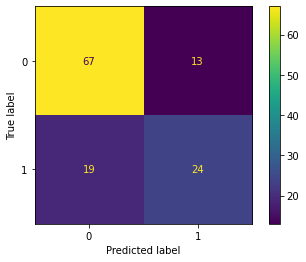

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mod, X_val, y_val);

**Step 2:** Look at both the confusion matrix and classification report on your validation set.  Make sure you can recall what each metric means.

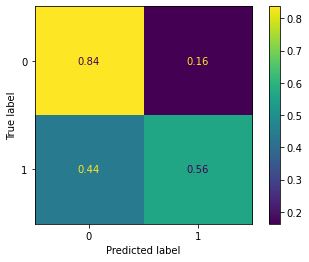

In [30]:
# your code here
plot_confusion_matrix(mod, X_val, y_val, normalize = 'true');

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(mod.predict(X_val), y_val))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        86
           1       0.56      0.65      0.60        37

    accuracy                           0.74       123
   macro avg       0.70      0.71      0.70       123
weighted avg       0.75      0.74      0.74       123



**Step 3:** Do a parameter search using the following four categories:
 - `n_estimators`
 - `max_depth`
 - `subsample`
 - `scale_pos_weight`
 
 When you are done, refit your model on the training data using the best combination, and look at your new classification report and confusion matrix to see how they changed

In [33]:
# your code here
n_estimators = [50, 100, 150, 200]
max_depth    = [3, 4, 5]
subsample    = [1.0, 0.8, 0.6]
scale_pos_weight = [1, 1 / y_train.mean(), 5]
cv_scores    = []

for estimator in n_estimators:
    for depth in max_depth:
        for sample in subsample:
            for weight in scale_pos_weight:
                mod.set_params(n_estimators = estimator, max_depth = depth, subsample = sample, scale_pos_weight = weight)
                print(f"Fitting model for {estimator} rounds, {depth} tree depth, {sample} sampling rate, {weight} positive sample weight")
                mod.fit(X_train, y_train)
                score = f1_score(mod.predict(X_val), y_val)
                cv_scores.append((score, estimator, depth, sample, weight))

Fitting model for 50 rounds, 3 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 1.0 sampling rate, 2.871345029239766

Fitting model for 200 rounds, 3 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 5 tree depth, 1.0 sampling rate, 1 posi

**Step 4:** Refit your model on all of your training data and get your test score.

In [34]:
# your code here
max(cv_scores)

(0.6966292134831461, 50, 3, 0.8, 5)

In [35]:
mod.set_params(n_estimators = 150, max_depth = 3, subsample = 0.6, scale_pos_weight = 5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
mod.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

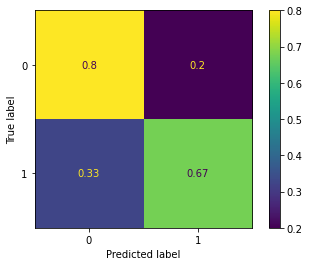

In [37]:
plot_confusion_matrix(mod, X_val, y_val, normalize = 'true');

In [38]:
print(classification_report(mod.predict(X_val), y_val))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        78
           1       0.67      0.64      0.66        45

    accuracy                           0.76       123
   macro avg       0.74      0.73      0.73       123
weighted avg       0.75      0.76      0.75       123



In [39]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])
mod.fit(X_train, y_train)
f1_score(mod.predict(X_test), y_test)

0.5737704918032787